In [28]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Lok+Sabha_2019.csv')

In [3]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.00,52,ST,Basic Level,3099414.00,231450.00,376892,482,377374,25.33,35.47,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.00,54,ST,Post Graduate,18477888.00,847000.00,318665,149,318814,21.40,29.96,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.00,52,ST,Basic Level,36491000.00,15300000.00,314057,181,314238,21.09,29.53,1489790
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.00,58,SC,Doctorate,74274036.00,8606522.00,644459,2416,646875,33.38,56.46,1937690
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.00,47,SC,Post Graduate,133784385.00,22251891.00,434199,1130,435329,22.47,38.00,1937690


# 1. Which State/UT contributes to the least number of total votes? Which State/UT contributes to the most number of total votes?

In [8]:
df.groupby("STATE")["TOTAL VOTES"].sum().sort_values()

STATE
Lakshadweep                     46221
Daman & Diu                     85190
Dadra & Nagar Haveli           190366
Andaman & Nicobar Islands      199875
Sikkim                         341973
Chandigarh                     436583
Mizoram                        495137
Arunachal Pradesh              640760
Puducherry                     753862
Goa                            828455
Nagaland                       999673
Meghalaya                     1340215
Manipur                       1598685
Tripura                       2063655
Jammu & Kashmir               3424112
Himachal Pradesh              3727232
Uttarakhand                   4698459
NCT OF Delhi                  8505810
Haryana                      12295211
Chhattisgarh                 12918679
Punjab                       13156797
Jharkhand                    14099959
Assam                        17318218
Telangana                    17826332
Kerala                       20010727
Odisha                       23005065
Gujara

# 2. Candidates from which constituency on an average seems to contribute most towards the amount of assets declared? Candidates from which constituency on an average seems to contribute least towards amount of assets declared?

In [10]:
df.groupby("CONSTITUENCY")["ASSETS"].mean().sort_values()

CONSTITUENCY
ALATHUR              2165624.67
VILUPPURAM           3032143.33
GAYA (SC)            3796683.45
ALIPURDUARS          3895905.50
BOLPUR               4090779.40
                       ...     
BANGALORE RURAL   1230421937.67
NELLORE           1289469814.67
GUNA              1296719487.00
CHHINDWARA        1655144708.25
CHEVELLA          3927395902.00
Name: ASSETS, Length: 539, dtype: float64

# 3. Consider assets and liabilities. Describe and explain both across the Education level? Provide a detailed justification for your answer.

In [34]:
#plt.bar(df["EDUCATION"],df["ASSETS"])
df_assets=df.groupby("EDUCATION")["ASSETS"]
df_assets_plot= df_assets.describe().T
df_assets_plot.loc[('Total'), :] = df_assets_plot.sum()
df_assets_plot

Text(0.5, 0, 'Post Graduate')

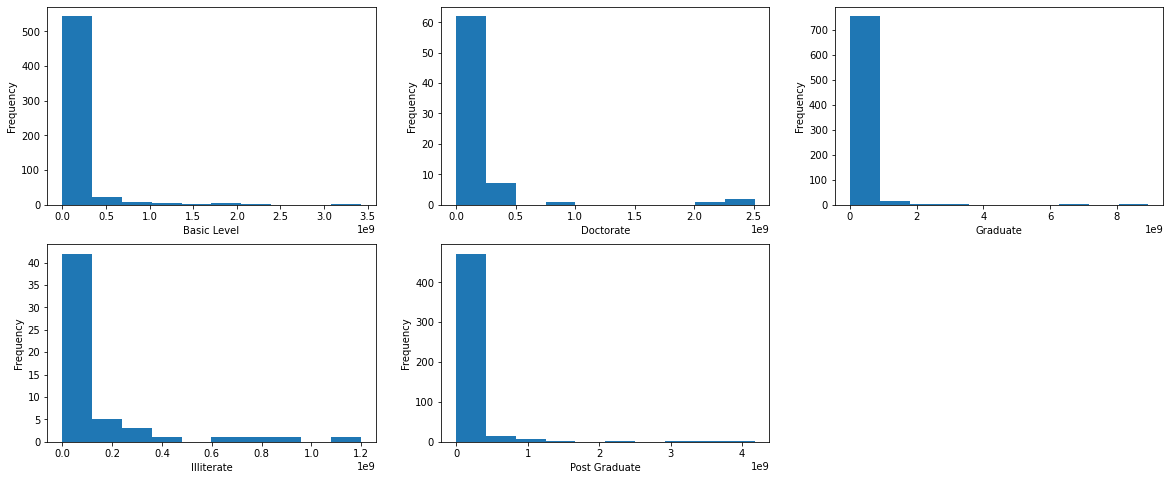

In [33]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
df_assets.get_group('Basic Level').plot(kind = 'hist')
plt.xlabel('Basic Level')
plt.subplot(2,3,2)
df_assets.get_group('Doctorate').plot(kind = 'hist')
plt.xlabel('Doctorate')
plt.subplot(2,3,3)
df_assets.get_group('Graduate').plot(kind = 'hist')
plt.xlabel('Graduate')
plt.subplot(2,3,4)
df_assets.get_group('Illiterate').plot(kind = 'hist')
plt.xlabel('Illiterate')
plt.subplot(2,3,5)
df_assets.get_group('Post Graduate').plot(kind = 'hist')
plt.xlabel('Post Graduate')

# 4. Are there any outliers in assets and liabilities across Education level? Back up your answer with a suitable plot/technique.

# 5. On the basis of the descriptive measure of variability, candidates with what education level shows the most and the least inconsistent behavior in the declared assets?

In [38]:
df_assets.describe()["std"]/df_assets.describe()["mean"]

EDUCATION
Basic Level     3.00
Doctorate       2.87
Graduate        3.24
Illiterate      1.87
Post Graduate   3.02
dtype: float64